In [1]:
import pandas as pd
import os


# Merging Data File

In [2]:
#Read From MULTIPLE FILES

path = os.getcwd()
files = os.listdir(path)
files

['.ipynb_checkpoints',
 'Sales_April_2020.csv',
 'Sales_April_2021.csv',
 'Sales_August_2020.csv',
 'Sales_August_2021.csv',
 'Sales_Data_Challenges.ipynb',
 'Sales_December_2020.csv',
 'Sales_December_2021.csv',
 'Sales_February_2020.csv',
 'Sales_February_2021.csv',
 'Sales_January_2020.csv',
 'Sales_January_2021.csv',
 'Sales_July_2020.csv',
 'Sales_July_2021.csv',
 'Sales_June_2020.csv',
 'Sales_June_2021.csv',
 'Sales_March_2020.csv',
 'Sales_March_2021.csv',
 'Sales_May_2020.csv',
 'Sales_May_2021.csv',
 'Sales_November_2020.csv',
 'Sales_November_2021.csv',
 'Sales_October_2020.csv',
 'Sales_October_2021.csv',
 'Sales_September_2020.csv',
 'Sales_September_2021.csv',
 'Spyder Version.py']

In [3]:
files_csv = [f for f in files if f[-3:] == 'csv']
(files_csv)

['Sales_April_2020.csv',
 'Sales_April_2021.csv',
 'Sales_August_2020.csv',
 'Sales_August_2021.csv',
 'Sales_December_2020.csv',
 'Sales_December_2021.csv',
 'Sales_February_2020.csv',
 'Sales_February_2021.csv',
 'Sales_January_2020.csv',
 'Sales_January_2021.csv',
 'Sales_July_2020.csv',
 'Sales_July_2021.csv',
 'Sales_June_2020.csv',
 'Sales_June_2021.csv',
 'Sales_March_2020.csv',
 'Sales_March_2021.csv',
 'Sales_May_2020.csv',
 'Sales_May_2021.csv',
 'Sales_November_2020.csv',
 'Sales_November_2021.csv',
 'Sales_October_2020.csv',
 'Sales_October_2021.csv',
 'Sales_September_2020.csv',
 'Sales_September_2021.csv']

In [4]:
df = pd.DataFrame()
for f in files_csv:
    data = pd.read_csv(f,delimiter=',')
    df = df.append(data)

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"


In [6]:
df.shape

(368935, 6)

# Data Cleaning

# Checking NaN in dataset

In [7]:
##Checking null columns 
df.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [8]:
##per% null columns 
(df.isna().sum()/len(df))*100


Order ID            0.292192
Product             0.292192
Quantity Ordered    0.292192
Price Each          0.292192
Order Date          0.292192
Purchase Address    0.292192
dtype: float64

In [9]:
#Before Dealing with nan coulmns we have to understand the Feature(Categorical/Numeric)
df['Product'].unique()

array(['USB-C Charging Cable', 'Wired Headphones',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       '20in Monitor', 'iPhone', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', '34in Ultrawide Monitor',
       'AA Batteries (4-pack)', 'Lightning Charging Cable', 'Product',
       'ThinkPad Laptop', 'Flatscreen TV', 'Google Phone',
       '27in 4K Gaming Monitor', 'LG Dryer', '27in FHD Monitor',
       'Vareebadd Phone', nan, 'LG Washing Machine'], dtype=object)

In [10]:
len(df['Purchase Address'].unique()) # There are customers who orederd more than one time

228277

In [11]:
df['Quantity Ordered'].unique()

array(['1', '2', '4', 'Quantity Ordered', '3', '5', nan, '6', '7', '8',
       '9'], dtype=object)

In [12]:
#Columns are reapeted in rows(Drop them)
df =df.drop(df[df['Product'] =='Product'].index)

In [13]:
#Checking (Worked)
df['Product'].unique()

array(['USB-C Charging Cable', 'Wired Headphones',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       '20in Monitor', 'iPhone', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', '34in Ultrawide Monitor',
       'AA Batteries (4-pack)', 'Lightning Charging Cable',
       'ThinkPad Laptop', 'Flatscreen TV', 'Google Phone',
       '27in 4K Gaming Monitor', 'LG Dryer', '27in FHD Monitor',
       'Vareebadd Phone', nan, 'LG Washing Machine'], dtype=object)

In [14]:
df.shape

(357015, 6)

Dataframe Contain : 

    3 Numric Features(Order_ID , Price_Each , Quantity_Orderd)
    
    3 Object Features(Product , Order Date , Purchase Address)

# Dropping NaN Rows


I dropped NaN rows rather than filling missing values because 

In [15]:
##Dropping All rows when Order_ID = NaN(Order Not Exist), i believe its not healthy to dublicate OrderID rows, in other word(Primary Key)

df = df[pd.notnull(df['Order ID'])]

In [16]:
df.shape
###Now Data are Clean

(355976, 6)

In [17]:
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

# Features Engineering

In [18]:
#spliting DateTime To Date  & Time
df[['Order_Date','Order_Time']] = df['Order Date'].str.split(" ",expand=True)


In [19]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date,Order_Time
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001",04/22/20,22:27
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215",04/02/20,15:14
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001",04/30/20,20:09
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016",04/05/20,00:23
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001",04/07/20,10:36


In [20]:
df = df.drop('Order Date',axis = 1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Date,Order_Time
0,171654,USB-C Charging Cable,1,11.95,"784 Pine St, Los Angeles, CA 90001",04/22/20,22:27
1,171655,Wired Headphones,2,11.99,"513 North St, Boston, MA 02215",04/02/20,15:14
2,171656,Bose SoundSport Headphones,1,99.99,"480 Maple St, Los Angeles, CA 90001",04/30/20,20:09
3,171657,Wired Headphones,1,11.99,"5 Pine St, San Francisco, CA 94016",04/05/20,00:23
4,171658,AAA Batteries (4-pack),2,2.99,"95 Lake St, New York City, NY 10001",04/07/20,10:36


In [21]:
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Purchase Address    False
Order_Date          False
Order_Time          False
dtype: bool

In [22]:
#Splitting Address into Street , City , Building number
df[['Street','City','Building Number']] = df['Purchase Address'].str.split(",",expand=True)

In [23]:
df = df.drop('Purchase Address',axis = 1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Date,Order_Time,Street,City,Building Number
0,171654,USB-C Charging Cable,1,11.95,04/22/20,22:27,784 Pine St,Los Angeles,CA 90001
1,171655,Wired Headphones,2,11.99,04/02/20,15:14,513 North St,Boston,MA 02215
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20,20:09,480 Maple St,Los Angeles,CA 90001
3,171657,Wired Headphones,1,11.99,04/05/20,00:23,5 Pine St,San Francisco,CA 94016
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20,10:36,95 Lake St,New York City,NY 10001


In [24]:
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order_Date          False
Order_Time          False
Street              False
City                False
Building Number     False
dtype: bool

In [25]:
#Spliting Order date to month , day , year
df[['Month','Day','Year']] = df['Order_Date'].str.split("/",expand=True)

In [26]:
df = df.drop('Order_Date',axis = 1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year
0,171654,USB-C Charging Cable,1,11.95,22:27,784 Pine St,Los Angeles,CA 90001,04,22,20
1,171655,Wired Headphones,2,11.99,15:14,513 North St,Boston,MA 02215,04,02,20
2,171656,Bose SoundSport Headphones,1,99.99,20:09,480 Maple St,Los Angeles,CA 90001,04,30,20
3,171657,Wired Headphones,1,11.99,00:23,5 Pine St,San Francisco,CA 94016,04,05,20
4,171658,AAA Batteries (4-pack),2,2.99,10:36,95 Lake St,New York City,NY 10001,04,07,20


In [27]:
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order_Time          False
Street              False
City                False
Building Number     False
Month               False
Day                 False
Year                False
dtype: bool

In [28]:
#Sort Data By Time 
df = df.sort_values(['Day', 'Month','Year'], ascending=[True, True,True])
df

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year
26,141257,Lightning Charging Cable,1,14.95,10:30,486 13th St,Boston,MA 02215,01,01,20
48,141277,Macbook Pro Laptop,1,1700.0,14:34,120 Ridge St,New York City,NY 10001,01,01,20
66,141295,AA Batteries (4-pack),1,3.84,17:02,275 4th St,San Francisco,CA 94016,01,01,20
136,141361,Wired Headphones,1,11.99,19:50,877 2nd St,Los Angeles,CA 90001,01,01,20
301,141514,USB-C Charging Cable,1,11.95,09:51,951 4th St,San Francisco,CA 94016,01,01,20
...,...,...,...,...,...,...,...,...,...,...,...
23796,306493,Bose SoundSport Headphones,1,99.99,12:41,210 Cedar St,New York City,NY 10001,12,31,21
23818,306514,AA Batteries (4-pack),2,3.84,17:05,741 Lake St,Seattle,WA 98101,12,31,21
23829,306525,USB-C Charging Cable,1,11.95,10:39,834 West St,Atlanta,GA 30301,12,31,21
23870,306564,27in 4K Gaming Monitor,1,389.99,18:55,810 Pine St,Seattle,WA 98101,12,31,21


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355976 entries, 26 to 23897
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          355976 non-null  object
 1   Product           355976 non-null  object
 2   Quantity Ordered  355976 non-null  object
 3   Price Each        355976 non-null  object
 4   Order_Time        355976 non-null  object
 5   Street            355976 non-null  object
 6   City              355976 non-null  object
 7   Building Number   355976 non-null  object
 8   Month             355976 non-null  object
 9   Day               355976 non-null  object
 10  Year              355976 non-null  object
dtypes: object(11)
memory usage: 32.6+ MB


In [30]:
# Creating Seasons Feature from  Month Feature
Season_df = pd.DataFrame(columns=['Season'])
Season_df['Season'] = df['Month']
Season_df['Season'] = Season_df.replace({'01': 'Fall',
                                         '02': 'Fall',
                                         '03': 'Spring',
                                         '04': 'Spring',
                                         '05': 'Spring',
                                         '06': 'Summer',
                                         '07': 'Summer',
                                         '08': 'Summer',
                                         '09': 'Autumn',
                                         '10': 'Autumn',
                                         '11': 'Autumn',
                                         '12': 'Fall',
                                                  })


In [31]:
Season_df['Season'].unique()

array(['Fall', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [32]:
df['Season']=Season_df['Season']
df['Season'].unique()

array(['Fall', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season
26,141257,Lightning Charging Cable,1,14.95,10:30,486 13th St,Boston,MA 02215,01,01,20,Fall
48,141277,Macbook Pro Laptop,1,1700.0,14:34,120 Ridge St,New York City,NY 10001,01,01,20,Fall
66,141295,AA Batteries (4-pack),1,3.84,17:02,275 4th St,San Francisco,CA 94016,01,01,20,Fall
136,141361,Wired Headphones,1,11.99,19:50,877 2nd St,Los Angeles,CA 90001,01,01,20,Fall
301,141514,USB-C Charging Cable,1,11.95,09:51,951 4th St,San Francisco,CA 94016,01,01,20,Fall


In [34]:
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order_Time          False
Street              False
City                False
Building Number     False
Month               False
Day                 False
Year                False
Season              False
dtype: bool

# EDA

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355976 entries, 26 to 23897
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          355976 non-null  object
 1   Product           355976 non-null  object
 2   Quantity Ordered  355976 non-null  object
 3   Price Each        355976 non-null  object
 4   Order_Time        355976 non-null  object
 5   Street            355976 non-null  object
 6   City              355976 non-null  object
 7   Building Number   355976 non-null  object
 8   Month             355976 non-null  object
 9   Day               355976 non-null  object
 10  Year              355976 non-null  object
 11  Season            355976 non-null  object
dtypes: object(12)
memory usage: 35.3+ MB


In [36]:
#Convert From Object to appropriate Data Type

df['Order ID'] = df['Order ID'].astype('int64')
df['Product'] = df['Product'].astype('category')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float64')
df['Month'] = df['Month'].astype('int64')
df['Day'] = df['Day'].astype('int64')
df['Year'] = df['Year'].astype('int64')
df['City'] = df['City'].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355976 entries, 26 to 23897
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Order ID          355976 non-null  int64   
 1   Product           355976 non-null  category
 2   Quantity Ordered  355976 non-null  int64   
 3   Price Each        355976 non-null  float64 
 4   Order_Time        355976 non-null  object  
 5   Street            355976 non-null  object  
 6   City              355976 non-null  category
 7   Building Number   355976 non-null  object  
 8   Month             355976 non-null  int64   
 9   Day               355976 non-null  int64   
 10  Year              355976 non-null  int64   
 11  Season            355976 non-null  object  
dtypes: category(2), float64(1), int64(5), object(4)
memory usage: 30.6+ MB


##    Descriptive analysis techniques

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Order ID,355976.0,229933.075932,51476.286540,141234.00,185506.00,229744.50,273770.25,328211.0
Quantity Ordered,355976.0,1.126562,0.446849,1.00,1.00,1.00,1.00,9.0
Price Each,355976.0,185.468090,334.927904,2.99,11.95,14.95,150.00,1700.0
Month,355976.0,7.433083,3.511621,1.00,5.00,8.00,11.00,12.0
Day,355976.0,15.752239,8.810541,1.00,8.00,16.00,23.00,31.0
Year,355976.0,20.468560,0.499225,20.00,20.00,20.00,21.00,22.0


In [39]:
df.astype('object').describe().transpose()

,count,unique,top,freq
Order ID,355976,186353,149779,6
Product,355976,19,USB-C Charging Cable,42111
Quantity Ordered,355976,9,1,322125
Price Each,355976.0,17.0,11.95,42111.0
Order_Time,355976,1440,19:23,454
Street,355976,47907,714 Jefferson St,23
City,355976,9,San Francisco,85656
Building Number,355976,10,CA 94016,85656
Month,355976,12,11,47082
Day,355976,31,7,11851


## Ploting Data to get insight 

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")


In [41]:
##Most Important  To Create A Target Column to Make Prediction On it(To use in Regression Model)
num = df['Price Each'] * df['Quantity Ordered']

df['Total_Price']= num
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season,Total_Price
23796,306493,Bose SoundSport Headphones,1,99.99,12:41,210 Cedar St,New York City,NY 10001,12,31,21,Fall,99.99
23818,306514,AA Batteries (4-pack),2,3.84,17:05,741 Lake St,Seattle,WA 98101,12,31,21,Fall,7.68
23829,306525,USB-C Charging Cable,1,11.95,10:39,834 West St,Atlanta,GA 30301,12,31,21,Fall,11.95
23870,306564,27in 4K Gaming Monitor,1,389.99,18:55,810 Pine St,Seattle,WA 98101,12,31,21,Fall,389.99
23897,306590,34in Ultrawide Monitor,1,379.99,07:49,188 13th St,Dallas,TX 75001,12,31,21,Fall,379.99


   Year  Total_Price
0    20  35383063.68
1    21  31028407.16
2    22      7565.78


<AxesSubplot:xlabel='Year', ylabel='Total_Price'>

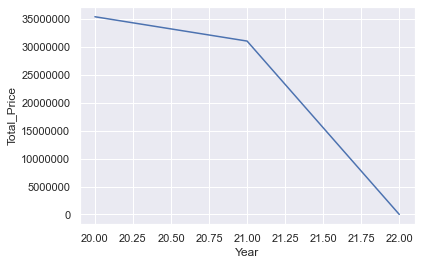

In [42]:

Total_Price_Year_summary = df.groupby('Year',as_index=False).agg({
    'Total_Price' : 'sum'
})
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')

print(Total_Price_Year_summary)
sns.lineplot(y="Total_Price", x="Year",
             data=Total_Price_Year_summary,ax=ax)


<AxesSubplot:xlabel='Month', ylabel='Total_Price'>

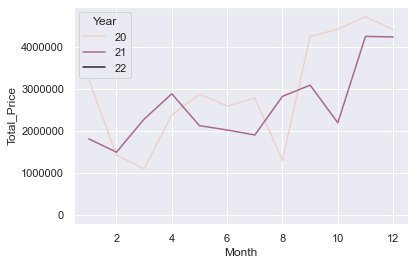

In [43]:
Total_Price_Month_summary = df.groupby(['Month','Year'],as_index=False).agg({
    'Total_Price' : 'sum'
})
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
sns.lineplot(y="Total_Price", x="Month", hue='Year',
             data=Total_Price_Month_summary)

<AxesSubplot:>

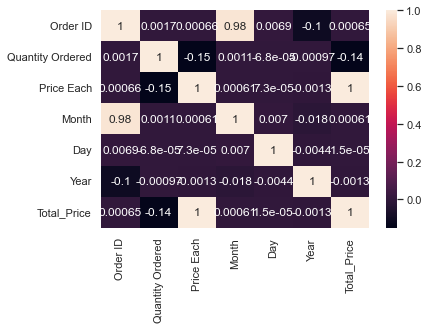

In [44]:
f, ax = plt.subplots()

ax.ticklabel_format(style='plain',useOffset=False)
sns.heatmap(df.corr(), annot=True,ax=ax)

In [45]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order_Time',
       'Street', 'City', 'Building Number', 'Month', 'Day', 'Year', 'Season',
       'Total_Price'],
      dtype='object')

In [46]:
Product_Sold_summary = df.groupby(['Product'],as_index=False).agg(
{
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
Product_Sold_summary.head(10)

,Product,Quantity Ordered,Total_Price
0,20in Monitor,7875,866171.25
1,27in 4K Gaming Monitor,11680,4555083.20
2,27in FHD Monitor,14523,2178304.77
3,34in Ultrawide Monitor,11800,4483882.00
4,AA Batteries (4-pack),53589,205781.76
5,AAA Batteries (4-pack),59775,178727.25
6,Apple Airpods Headphones,29874,4481100.00
7,Bose SoundSport Headphones,25695,2569243.05
8,Flatscreen TV,9213,2763900.00
9,Google Phone,10564,6338400.00


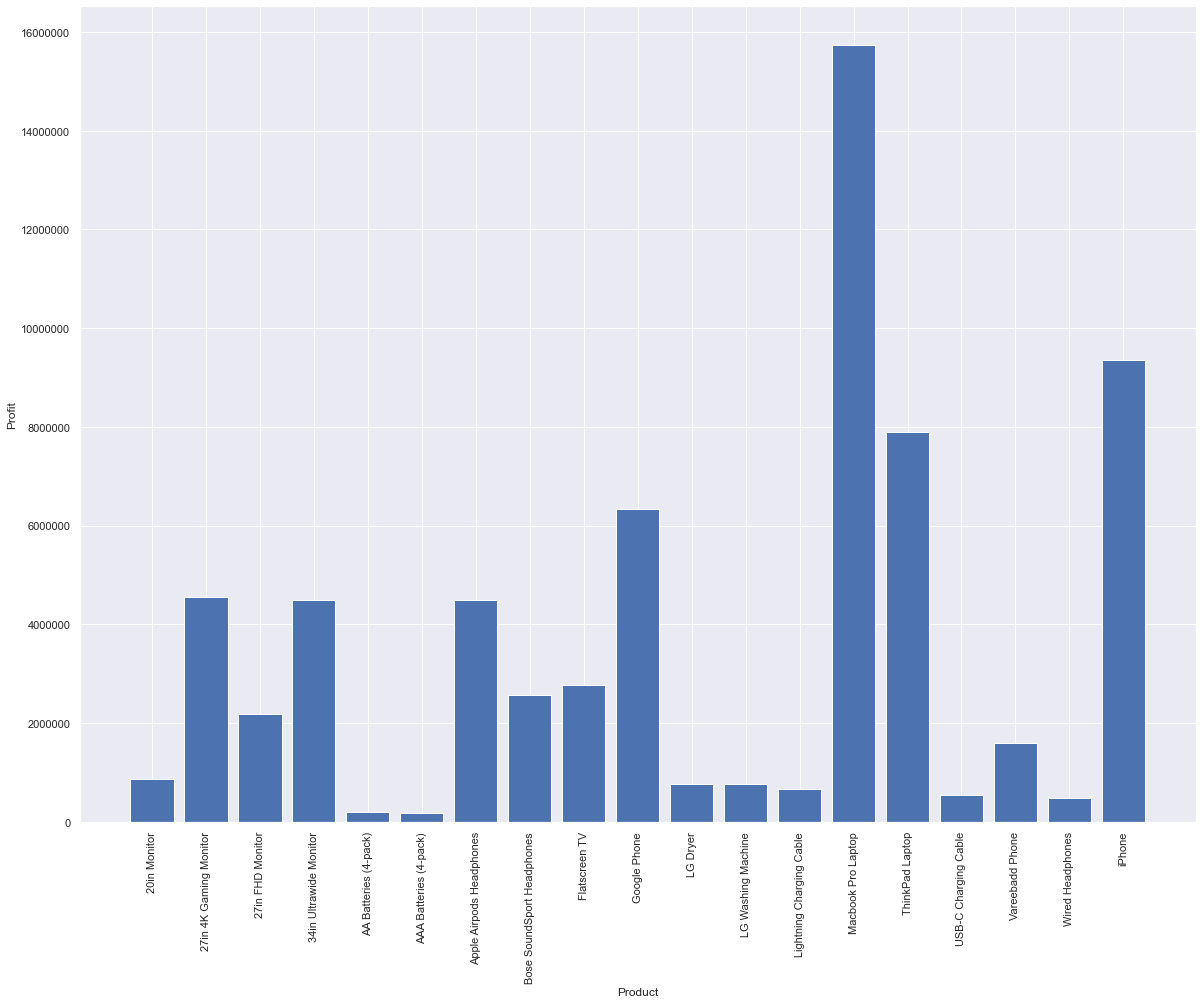

In [47]:

plt.figure(figsize=(20, 15))
plt.bar(Product_Sold_summary['Product'], Product_Sold_summary['Total_Price'])
plt.xticks(Product_Sold_summary['Product'],rotation=90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Product')
plt.ylabel('Profit')
plt.show()

In [48]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season,Total_Price
26,141257,Lightning Charging Cable,1,14.95,10:30,486 13th St,Boston,MA 02215,1,1,20,Fall,14.95
48,141277,Macbook Pro Laptop,1,1700.00,14:34,120 Ridge St,New York City,NY 10001,1,1,20,Fall,1700.00
66,141295,AA Batteries (4-pack),1,3.84,17:02,275 4th St,San Francisco,CA 94016,1,1,20,Fall,3.84
136,141361,Wired Headphones,1,11.99,19:50,877 2nd St,Los Angeles,CA 90001,1,1,20,Fall,11.99
301,141514,USB-C Charging Cable,1,11.95,09:51,951 4th St,San Francisco,CA 94016,1,1,20,Fall,11.95
314,141527,USB-C Charging Cable,1,11.95,16:34,229 South St,San Francisco,CA 94016,1,1,20,Fall,11.95
316,141529,AAA Batteries (4-pack),1,2.99,09:00,680 Main St,Los Angeles,CA 90001,1,1,20,Fall,2.99
332,141545,Google Phone,1,600.00,12:30,854 Cedar St,Dallas,TX 75001,1,1,20,Fall,600.00
341,141552,Apple Airpods Headphones,1,150.00,22:07,718 12th St,New York City,NY 10001,1,1,20,Fall,150.00
411,141621,iPhone,1,700.00,20:51,32 8th St,Boston,MA 02215,1,1,20,Fall,700.00


In [49]:
City_Sold_summary = df.groupby(['City','Product'],as_index=False).agg(
{
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
City_Sold_summary.head(10)

,City,Product,Quantity Ordered,Total_Price
0,Atlanta,20in Monitor,625,68743.75
1,Atlanta,27in 4K Gaming Monitor,975,380240.25
2,Atlanta,27in FHD Monitor,1143,171438.57
3,Atlanta,34in Ultrawide Monitor,925,351490.75
4,Atlanta,AA Batteries (4-pack),4338,16657.92
5,Atlanta,AAA Batteries (4-pack),4756,14220.44
6,Atlanta,Apple Airpods Headphones,2419,362850.00
7,Atlanta,Bose SoundSport Headphones,2042,204179.58
8,Atlanta,Flatscreen TV,766,229800.00
9,Atlanta,Google Phone,823,493800.00


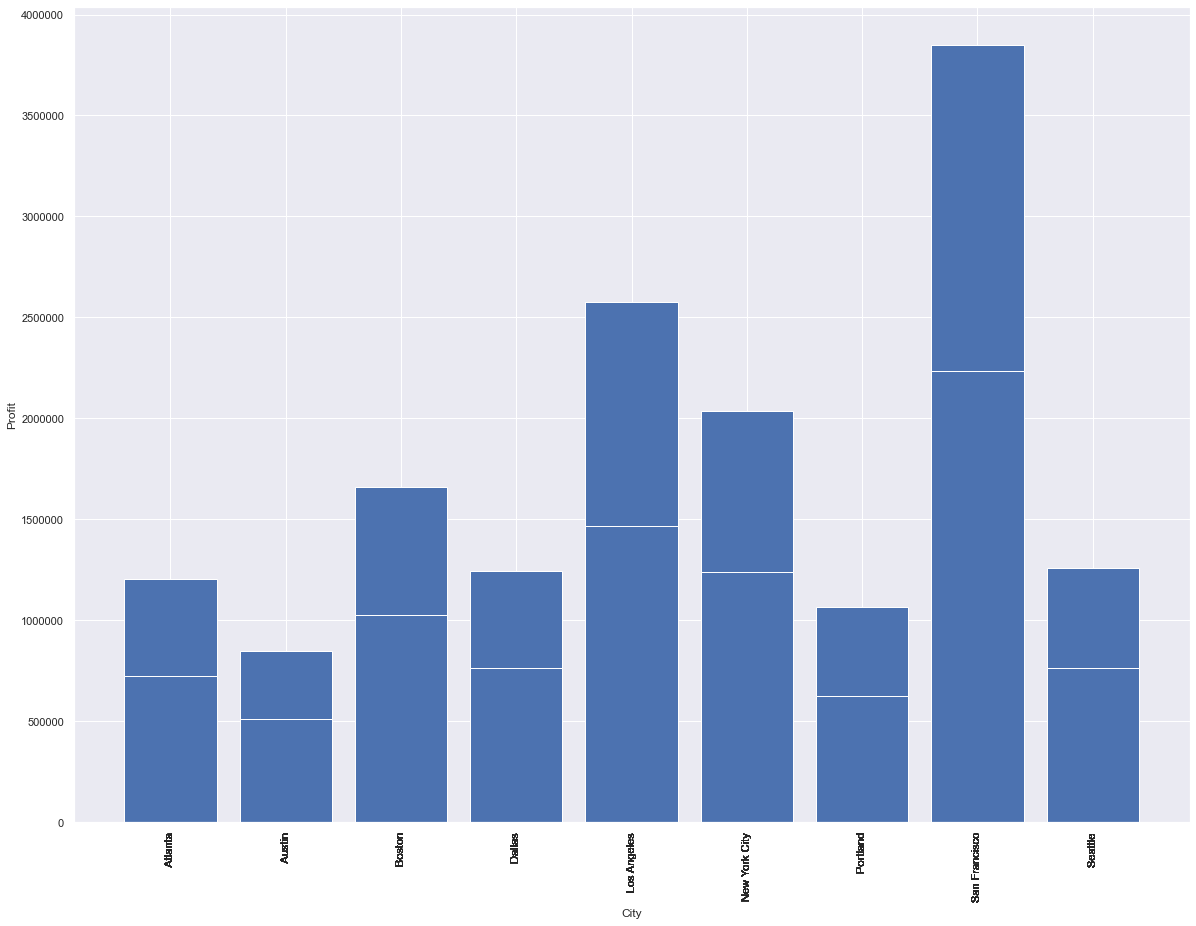

In [50]:
#categori_product = Product_Sold_summary['Product']
plt.figure(figsize=(20, 15))
plt.bar(City_Sold_summary['City'], City_Sold_summary['Total_Price'])
plt.xticks(City_Sold_summary['City'],rotation=90)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('City')
plt.ylabel('Profit')
plt.show()

<AxesSubplot:xlabel='City', ylabel='Total_Price'>

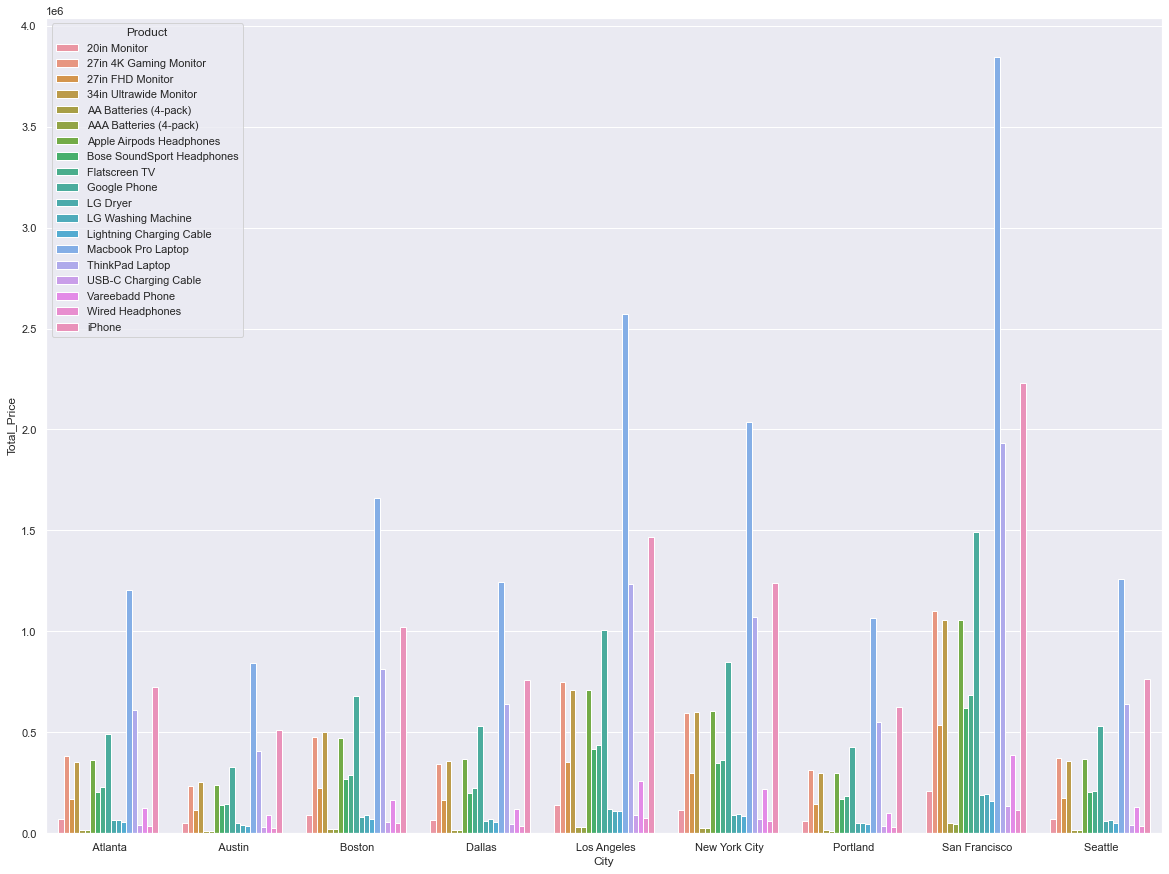

In [51]:
plt.figure(figsize=(20, 15))
sns.barplot(x="City", y="Total_Price", data=City_Sold_summary,hue = 'Product')

In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season,Total_Price
26,141257,Lightning Charging Cable,1,14.95,10:30,486 13th St,Boston,MA 02215,1,1,20,Fall,14.95
48,141277,Macbook Pro Laptop,1,1700.00,14:34,120 Ridge St,New York City,NY 10001,1,1,20,Fall,1700.00
66,141295,AA Batteries (4-pack),1,3.84,17:02,275 4th St,San Francisco,CA 94016,1,1,20,Fall,3.84
136,141361,Wired Headphones,1,11.99,19:50,877 2nd St,Los Angeles,CA 90001,1,1,20,Fall,11.99
301,141514,USB-C Charging Cable,1,11.95,09:51,951 4th St,San Francisco,CA 94016,1,1,20,Fall,11.95


In [53]:
Product_Season_summary = df.groupby(['Product','Season'],as_index=False).agg(
{
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
Product_Season_summary.head(10)

,Product,Season,Quantity Ordered,Total_Price
0,20in Monitor,Autumn,2714,298512.86
1,20in Monitor,Fall,1992,219100.08
2,20in Monitor,Spring,1613,177413.87
3,20in Monitor,Summer,1556,171144.44
4,27in 4K Gaming Monitor,Autumn,4085,1593109.15
5,27in 4K Gaming Monitor,Fall,2959,1153980.41
6,27in 4K Gaming Monitor,Spring,2298,896197.02
7,27in 4K Gaming Monitor,Summer,2338,911796.62
8,27in FHD Monitor,Autumn,5003,750399.97
9,27in FHD Monitor,Fall,3635,545213.65


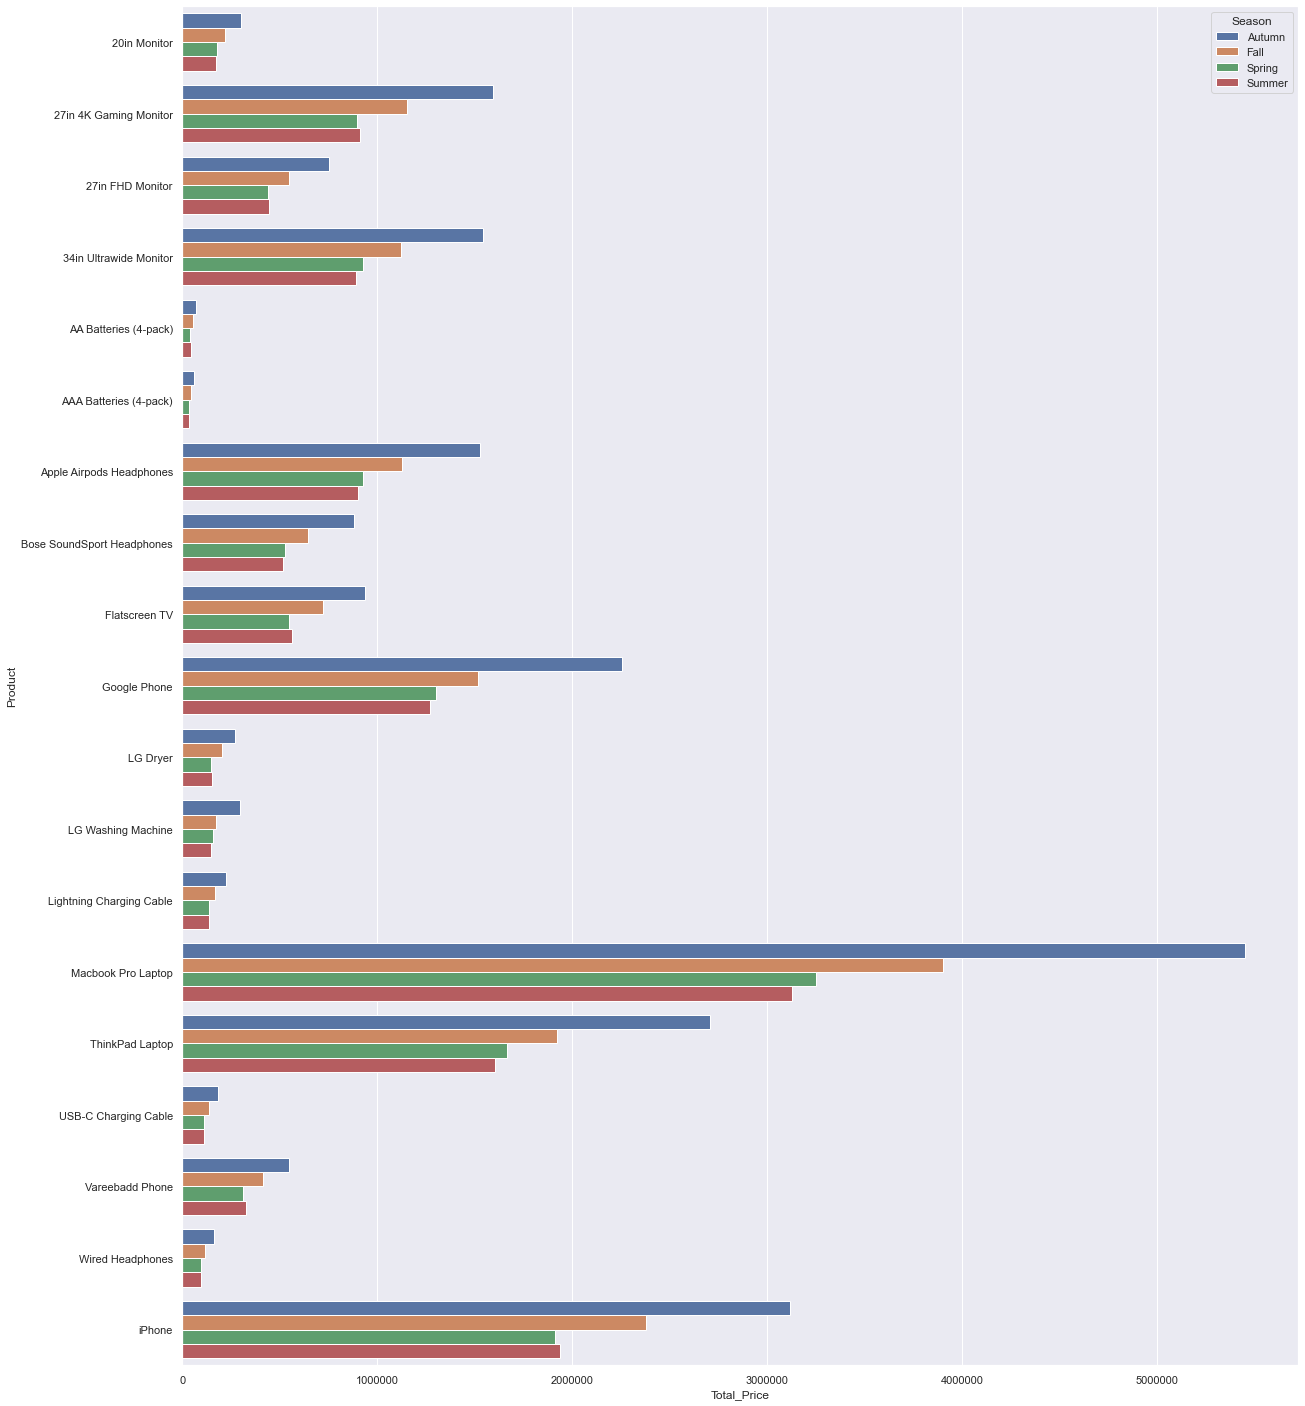

In [54]:
plt.figure(figsize=(20, 25))
plot =sns.barplot(x="Total_Price", y="Product", data=Product_Season_summary,hue = 'Season')
plot.set_yticklabels(plot.get_yticklabels())

plot.ticklabel_format(style="plain",axis='x')

<AxesSubplot:>

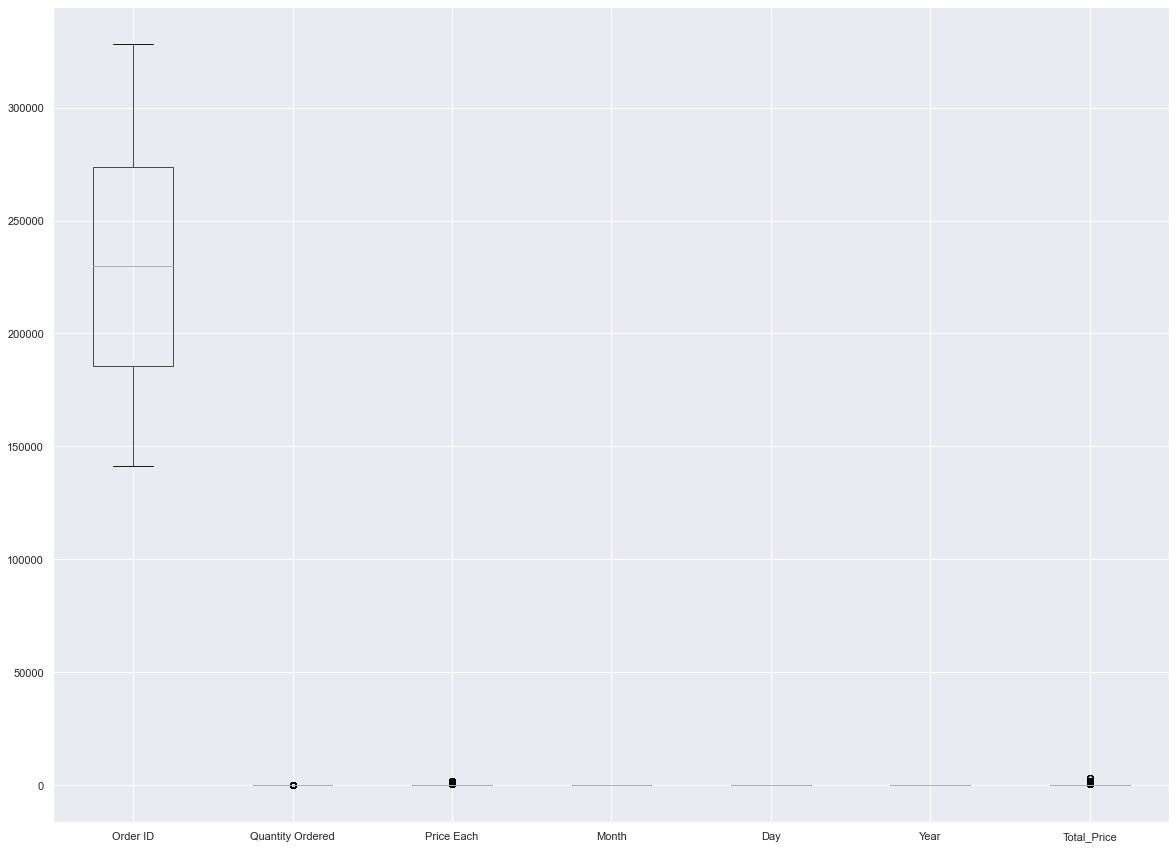

In [55]:
#Checking Outliers
df.boxplot(figsize=(20,15))

In [56]:
#Price Each and Total price got some outliers (Check the range diff between Max And Mean)----DF.Describe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season,Total_Price
26,141257,Lightning Charging Cable,1,14.95,10:30,486 13th St,Boston,MA 02215,1,1,20,Fall,14.95
48,141277,Macbook Pro Laptop,1,1700.00,14:34,120 Ridge St,New York City,NY 10001,1,1,20,Fall,1700.00
66,141295,AA Batteries (4-pack),1,3.84,17:02,275 4th St,San Francisco,CA 94016,1,1,20,Fall,3.84
136,141361,Wired Headphones,1,11.99,19:50,877 2nd St,Los Angeles,CA 90001,1,1,20,Fall,11.99
301,141514,USB-C Charging Cable,1,11.95,09:51,951 4th St,San Francisco,CA 94016,1,1,20,Fall,11.95


In [57]:
len(df['Order_Time'].unique())

1440

In [58]:
Product_OrderTime_summary = df.groupby(['Year','Month','Order_Time'],as_index=True).agg(
{'Product' : 'count',
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
Product_OrderTime_summary.head(10)

Product  Quantity Ordered  Total_Price
Year Month Order_Time                                        
20   1     00:00             8                10       985.75
           00:01             8                 8      1232.60
           00:02             7                 7      3306.82
           00:03             4                 4      1002.98
           00:04             5                 5       292.87
           00:05            12                12      1214.70
           00:06            10                11      1505.64
           00:07             8                 8      3122.89
           00:08             9                 9      3223.89
           00:09             3                 4       323.89

<AxesSubplot:xlabel='Order_Time', ylabel='Quantity Ordered'>

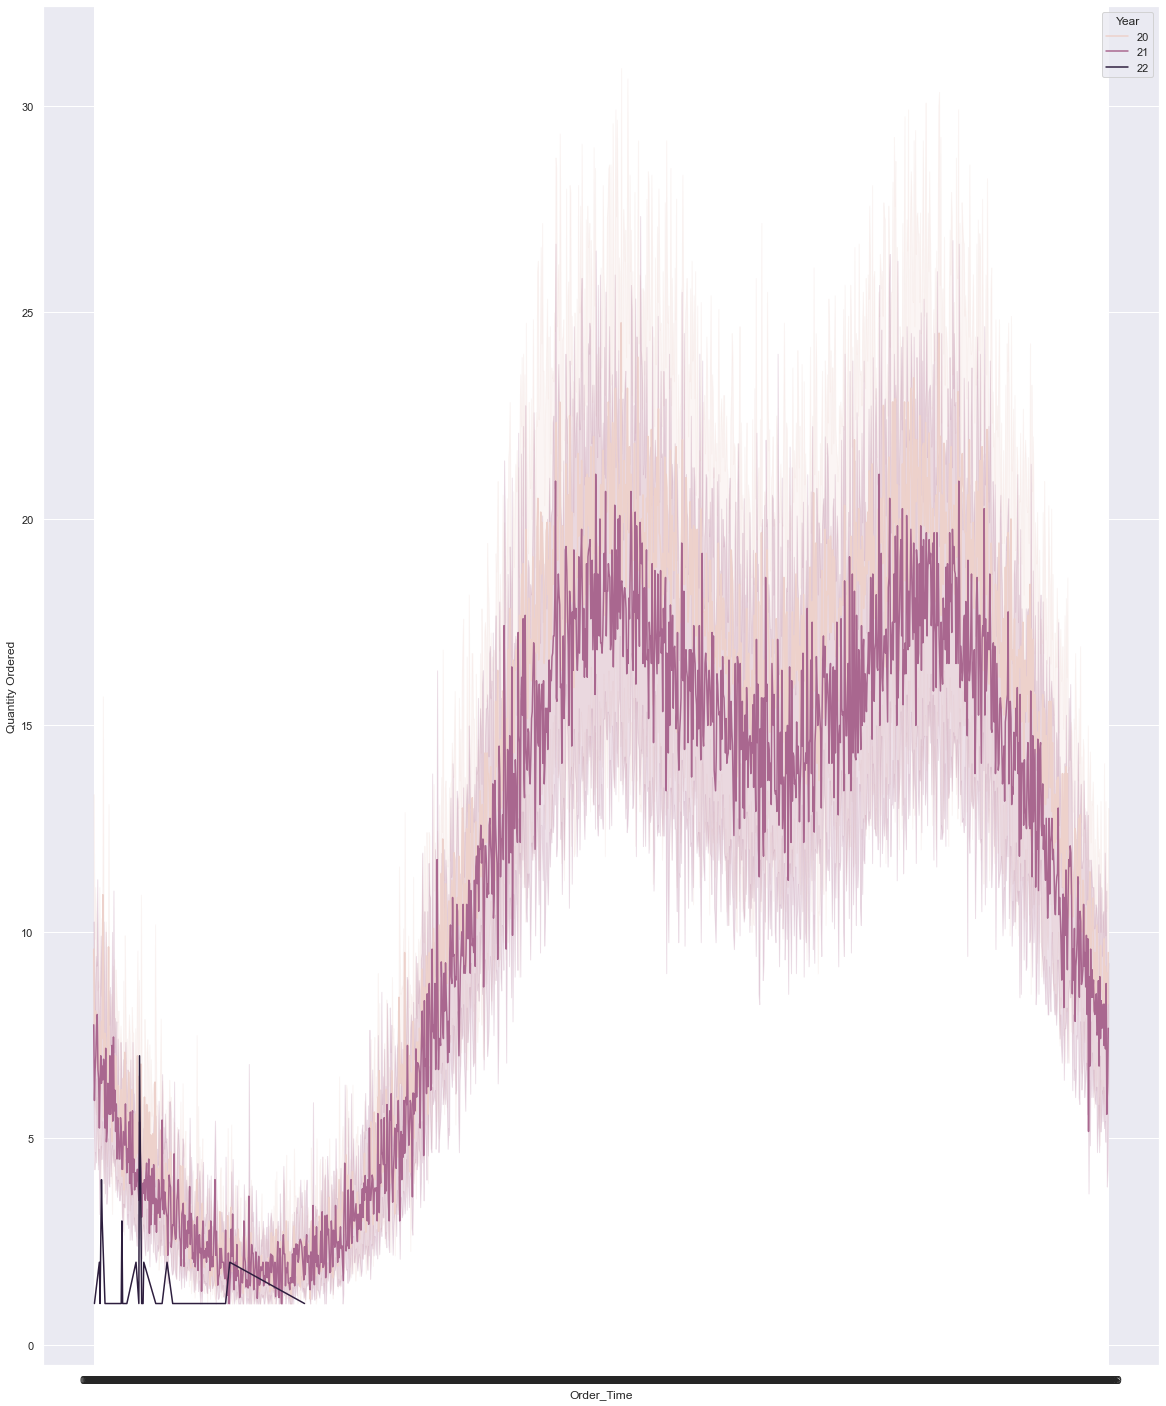

In [59]:
#Sort Data By Order Time 
Product_OrderTime_summary = Product_OrderTime_summary.sort_values(['Order_Time'], ascending=[True])
Product_OrderTime_summary

plt.figure(figsize=(20, 25))
sns.lineplot(y="Quantity Ordered", x="Order_Time",hue='Year',data=Product_OrderTime_summary)


<AxesSubplot:xlabel='Order_Time', ylabel='Product'>

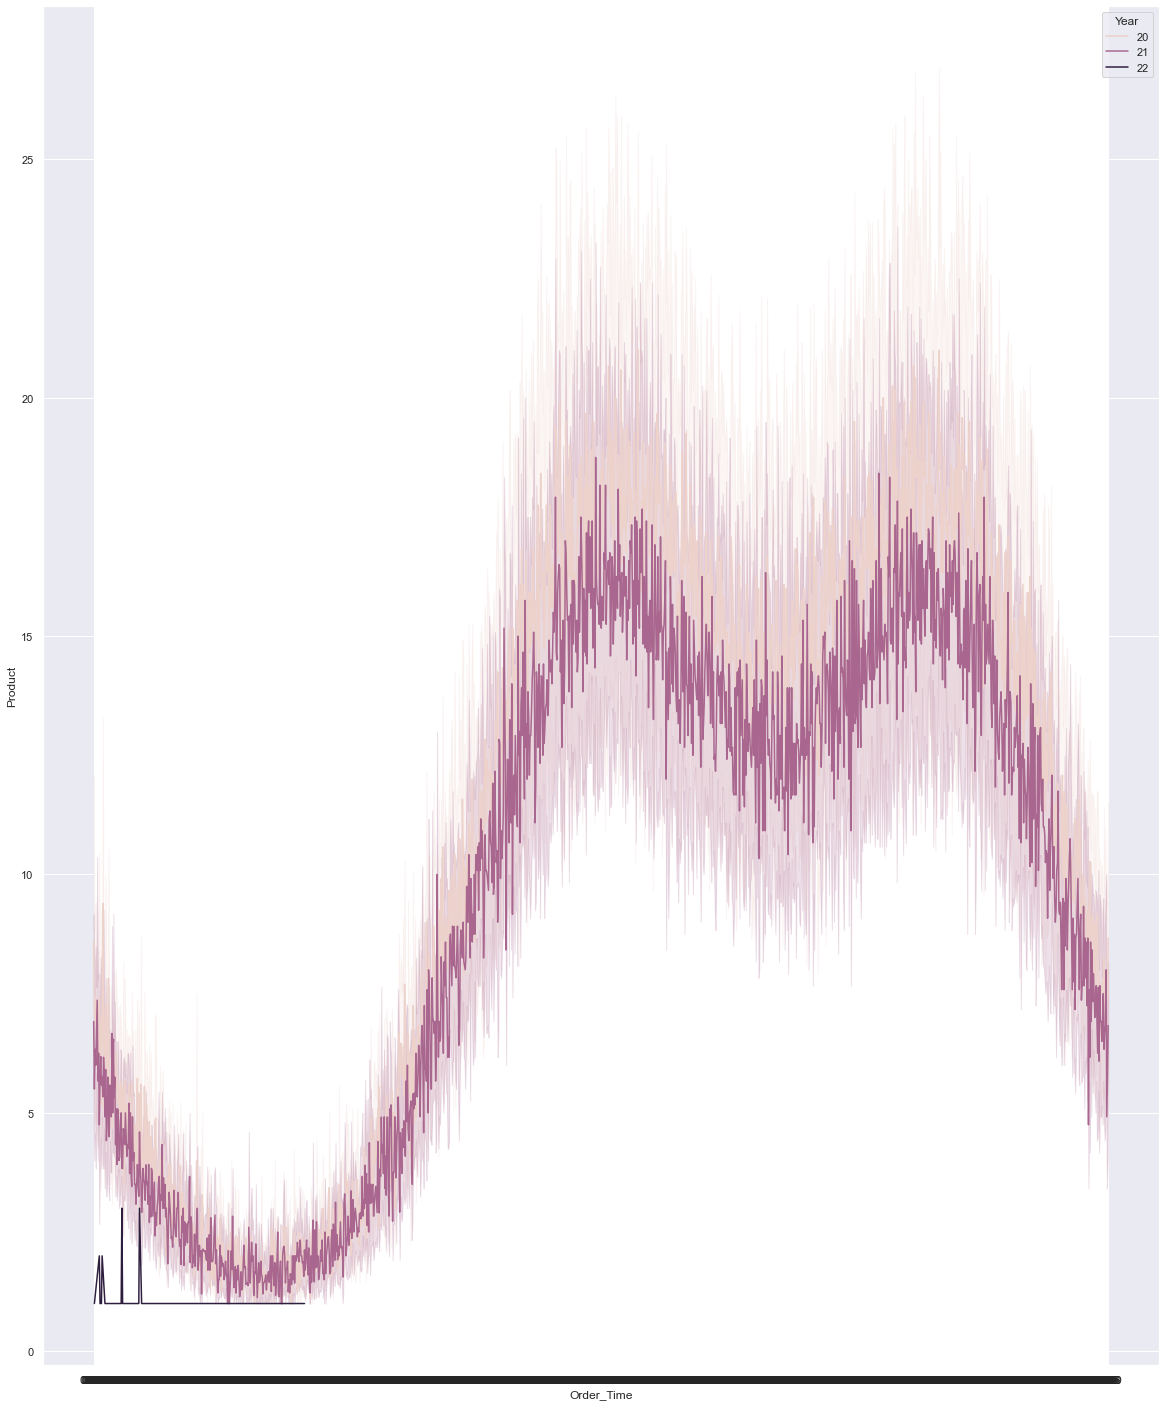

In [60]:

plt.figure(figsize=(20, 25))
sns.lineplot(y="Product", x="Order_Time",hue='Year',data=Product_OrderTime_summary)


In [61]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season,Total_Price
26,141257,Lightning Charging Cable,1,14.95,10:30,486 13th St,Boston,MA 02215,1,1,20,Fall,14.95
48,141277,Macbook Pro Laptop,1,1700.00,14:34,120 Ridge St,New York City,NY 10001,1,1,20,Fall,1700.00
66,141295,AA Batteries (4-pack),1,3.84,17:02,275 4th St,San Francisco,CA 94016,1,1,20,Fall,3.84
136,141361,Wired Headphones,1,11.99,19:50,877 2nd St,Los Angeles,CA 90001,1,1,20,Fall,11.99
301,141514,USB-C Charging Cable,1,11.95,09:51,951 4th St,San Francisco,CA 94016,1,1,20,Fall,11.95


In [62]:
df['Year'].value_counts()

20    189218
21    166720
22        38
Name: Year, dtype: int64

In [63]:
Month_Product_summary = df.groupby(['Month','Product'],as_index=False).agg(
{    
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
Month_Product_summary.head(10)

,Month,Product,Quantity Ordered,Total_Price
0,1,20in Monitor,599,65884.01
1,1,27in 4K Gaming Monitor,925,360740.75
2,1,27in FHD Monitor,1088,163189.12
3,1,34in Ultrawide Monitor,877,333251.23
4,1,AA Batteries (4-pack),4121,15824.64
5,1,AAA Batteries (4-pack),4593,13733.07
6,1,Apple Airpods Headphones,2260,339000.00
7,1,Bose SoundSport Headphones,1979,197880.21
8,1,Flatscreen TV,749,224700.00
9,1,Google Phone,743,445800.00


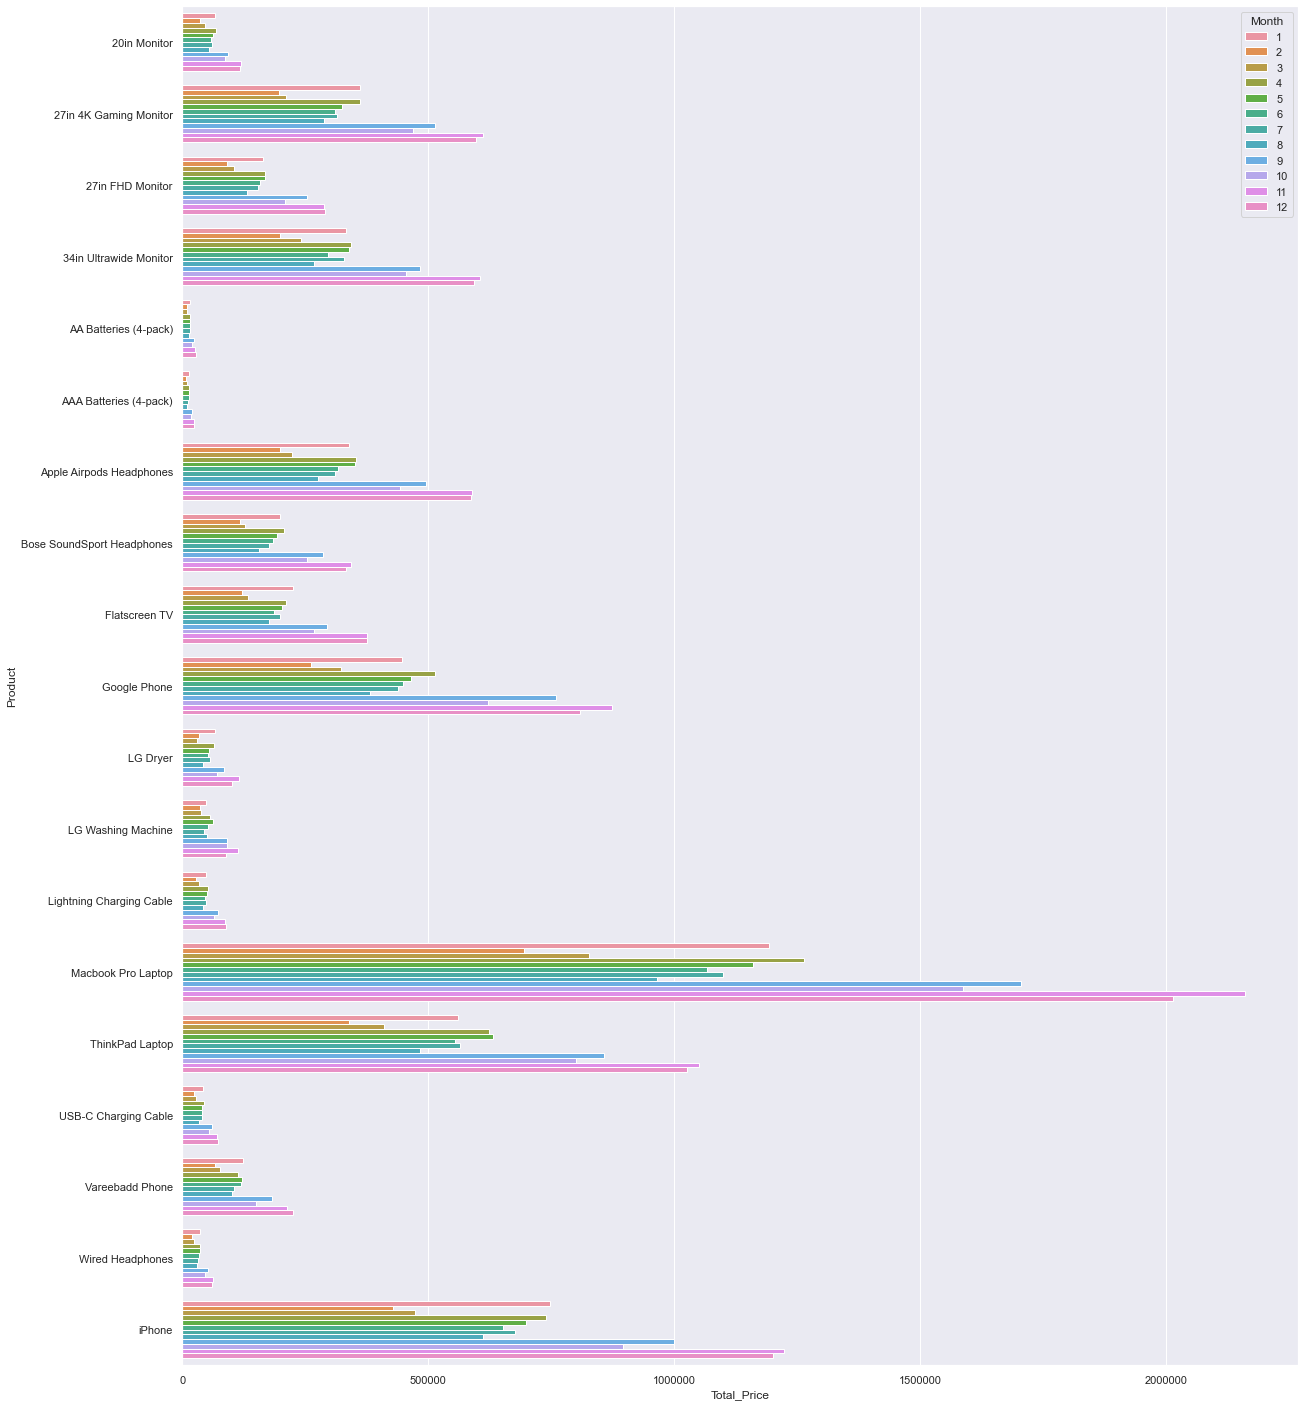

In [64]:
plt.figure(figsize=(20, 25))
plot =sns.barplot(x="Total_Price", y="Product", data=Month_Product_summary,hue = 'Month')
plot.set_yticklabels(plot.get_yticklabels())

plot.ticklabel_format(style="plain",axis='x')

In [65]:
subset =  df.loc[df['Year'] == 2020]
Month_2020_summary = subset.groupby(['Month','Product'],as_index=False).agg(
{    
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
Month_Product_summary.head(10)

,Month,Product,Quantity Ordered,Total_Price
0,1,20in Monitor,599,65884.01
1,1,27in 4K Gaming Monitor,925,360740.75
2,1,27in FHD Monitor,1088,163189.12
3,1,34in Ultrawide Monitor,877,333251.23
4,1,AA Batteries (4-pack),4121,15824.64
5,1,AAA Batteries (4-pack),4593,13733.07
6,1,Apple Airpods Headphones,2260,339000.00
7,1,Bose SoundSport Headphones,1979,197880.21
8,1,Flatscreen TV,749,224700.00
9,1,Google Phone,743,445800.00


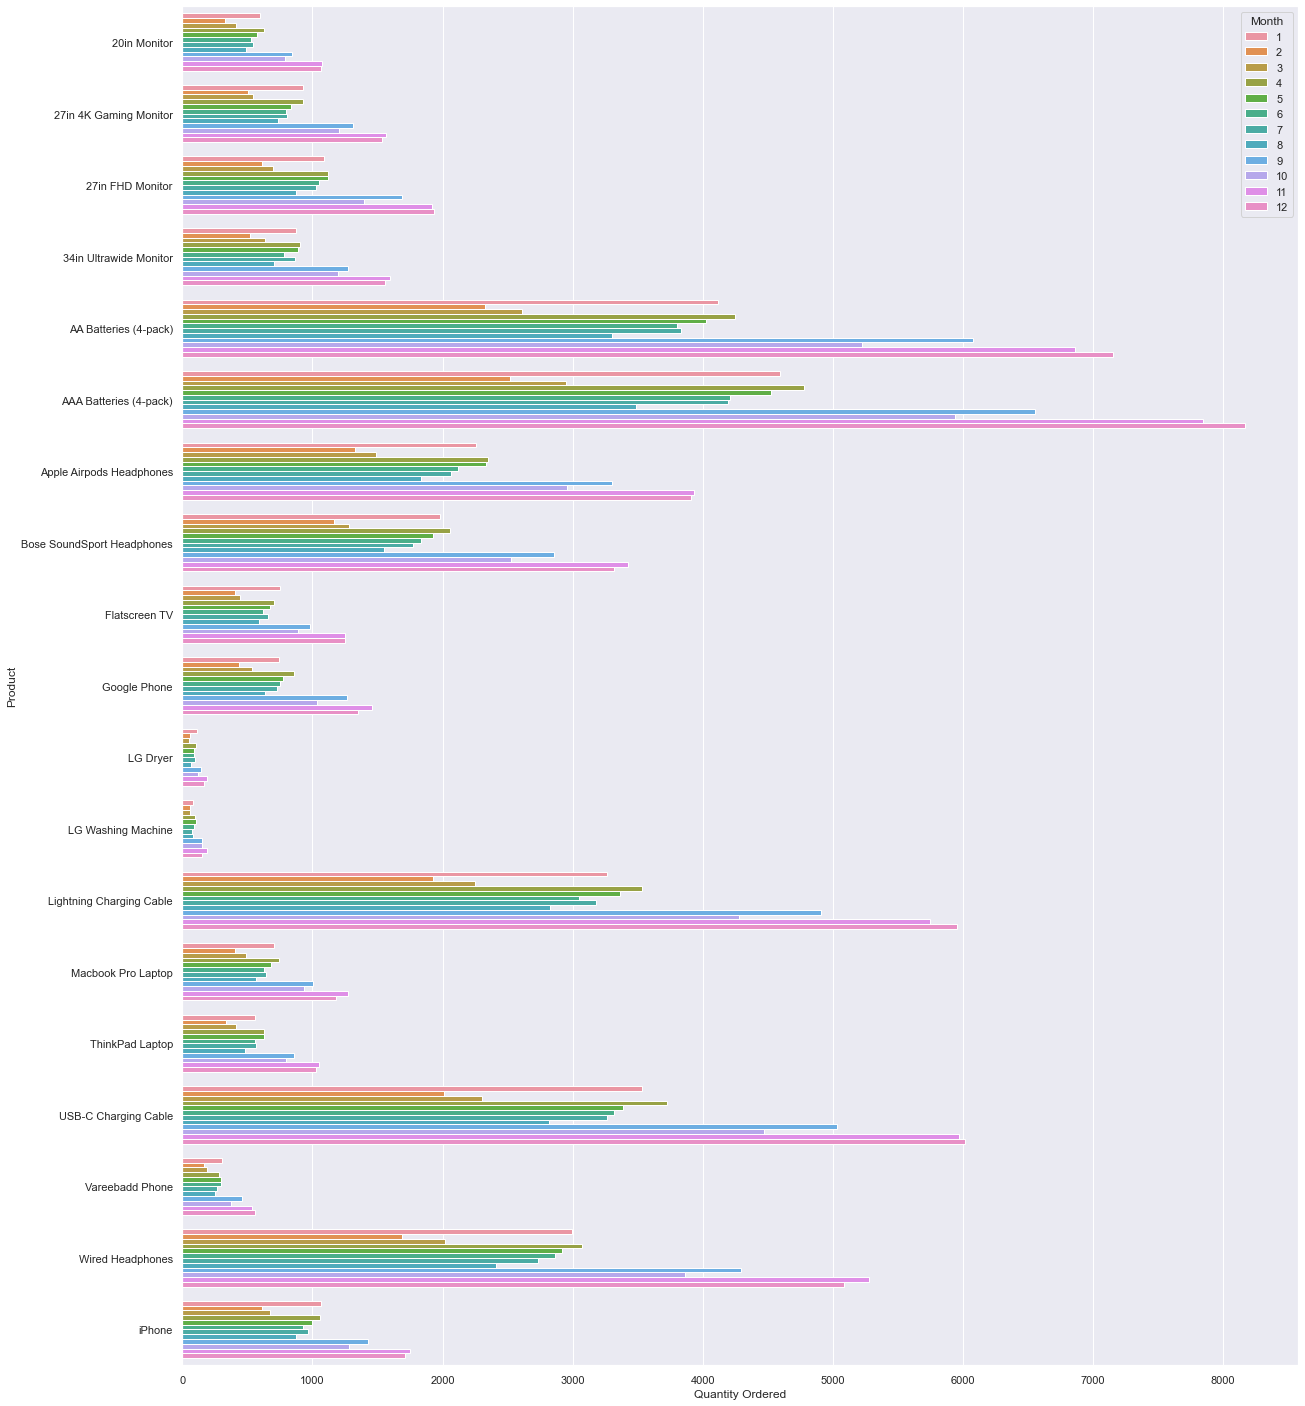

In [66]:
#Product Orderd in 2000

plt.figure(figsize=(20, 25))
plot =sns.barplot(x="Quantity Ordered", y="Product", data=Month_Product_summary,hue = 'Month')
plot.set_yticklabels(plot.get_yticklabels())

plot.ticklabel_format(style="plain",axis='x')

In [67]:
subset =  df.loc[df['Year'] == 2021]
Month_2020_summary = subset.groupby(['Month','Product'],as_index=False).agg(
{    
    'Quantity Ordered' : 'sum',
    'Total_Price' : 'sum',

}
)
Month_Product_summary.head(10)

,Month,Product,Quantity Ordered,Total_Price
0,1,20in Monitor,599,65884.01
1,1,27in 4K Gaming Monitor,925,360740.75
2,1,27in FHD Monitor,1088,163189.12
3,1,34in Ultrawide Monitor,877,333251.23
4,1,AA Batteries (4-pack),4121,15824.64
5,1,AAA Batteries (4-pack),4593,13733.07
6,1,Apple Airpods Headphones,2260,339000.00
7,1,Bose SoundSport Headphones,1979,197880.21
8,1,Flatscreen TV,749,224700.00
9,1,Google Phone,743,445800.00


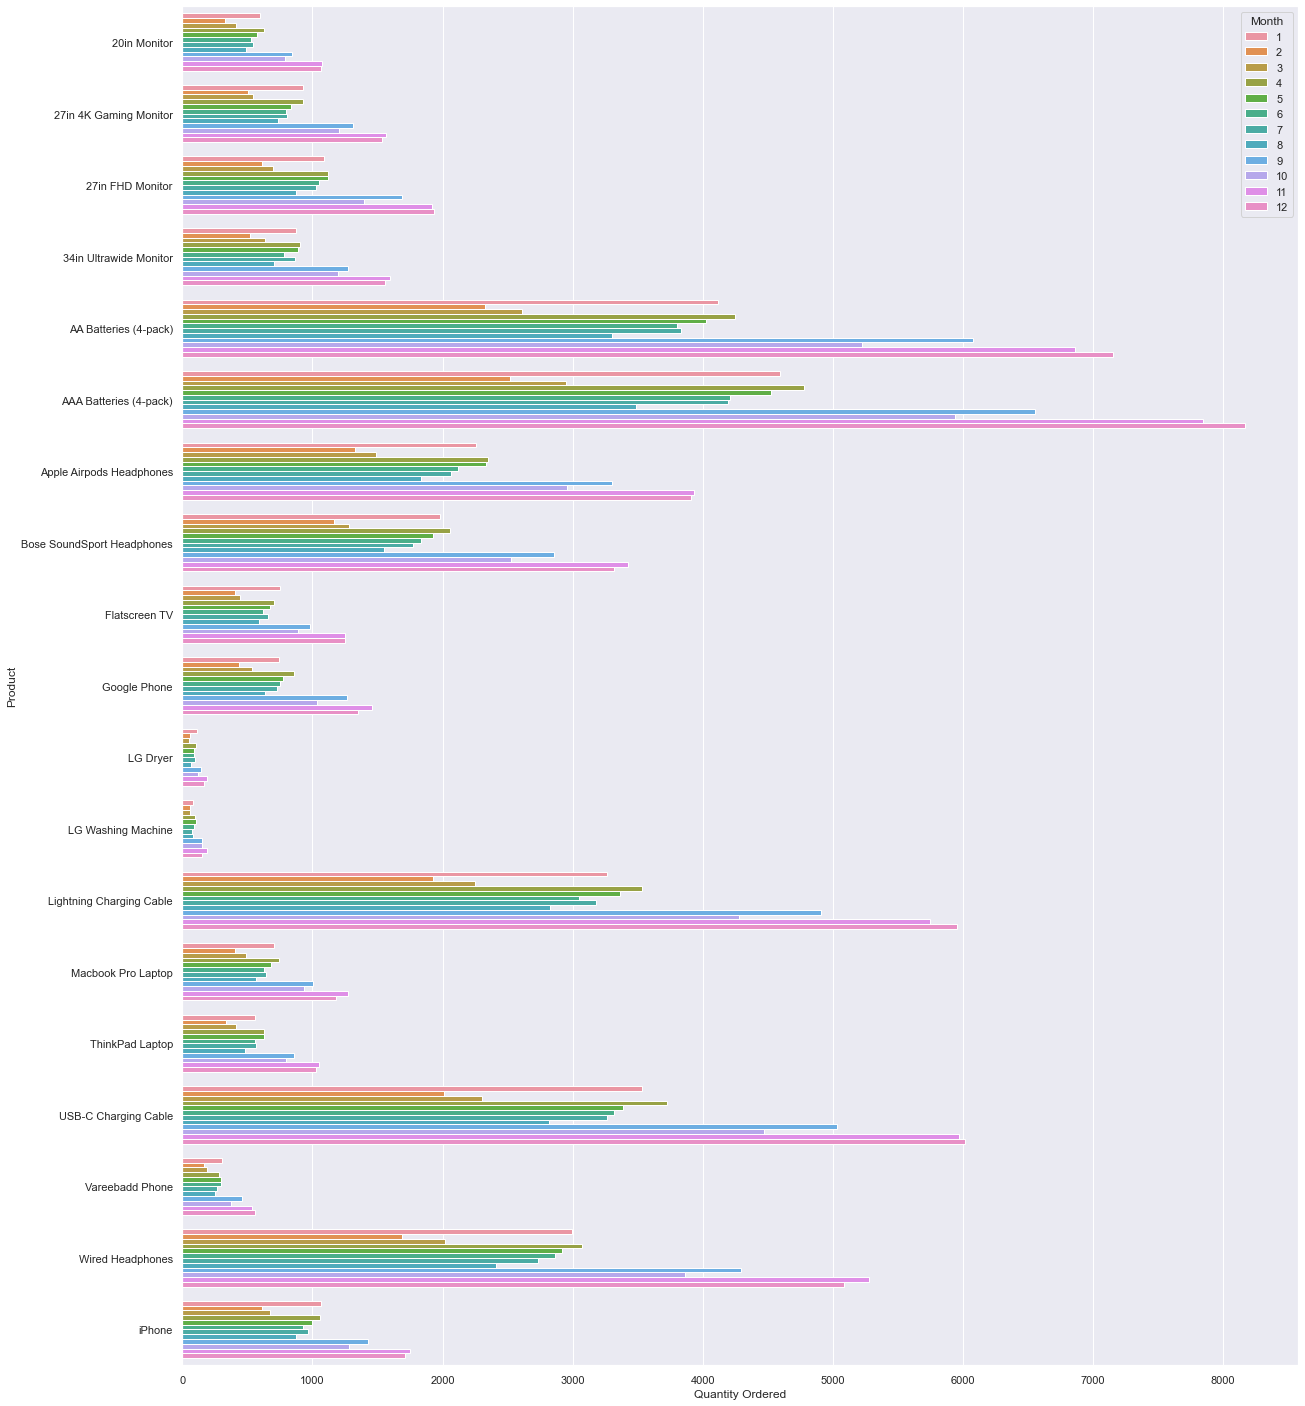

In [68]:
#Product Orderd in 2021

plt.figure(figsize=(20, 25))
plot =sns.barplot(x="Quantity Ordered", y="Product", data=Month_Product_summary,hue = 'Month')
plot.set_yticklabels(plot.get_yticklabels())

plot.ticklabel_format(style="plain",axis='x')

# Insight Gained : 

I will assume that this data belong to Online Product Store Located in the United State 
for example : Amazon

1) Total Price Decreased From 2020 to 2021 

2) Total Price Increasing from Months 8 - 12 and Decreasing in Months (1-3 and 7-8)

3) No Linear Relation between Features

4) Most Profitable Product is MacBook Pro Laptop

5) Least Profitable Product is AA Batteries

6) San francesco has the best Profit

7) Austin has the least Profit

8) San francesco best Product(Profit) is Macbook pro And Least Product(Profit) is AA Batteries

9) People love to order more differents kind  of product in Autumn

10) People love to order product from between afternoon and evening

11) Most selling Product in Mar-2020 is  AAA-Batteries

# Modeling-Classification

In [69]:
#split data to 2 Dataframe(train,test) Randomly

# Creating a dataframe with 80% 
df_train = df.sample(frac = 0.80)
 

# rest of the 20% values
df_test = df.drop(df_train.index)

In [70]:
df_train.head()

,Order ID,Product,Quantity Ordered,Price Each,Order_Time,Street,City,Building Number,Month,Day,Year,Season,Total_Price
2120,172908,27in 4K Gaming Monitor,1,389.99,12:23,658 7th St,New York City,NY 10001,4,29,21,Spring,389.99
9972,180464,USB-C Charging Cable,1,11.95,17:22,939 Spruce St,New York City,NY 10001,4,3,21,Spring,11.95
8,186186,Lightning Charging Cable,1,14.95,08:14,367 Cherry St,San Francisco,CA 94016,5,9,21,Spring,14.95
3946,201403,Lightning Charging Cable,1,14.95,15:04,979 4th St,New York City,NY 10001,6,3,21,Summer,14.95
14957,185200,AA Batteries (4-pack),1,3.84,20:27,63 Wilson St,San Francisco,CA 94016,4,24,21,Spring,3.84


In [71]:
#droping unesful columns
df_train = df_train.drop(columns=['Order ID','Order_Time','Street','Building Number'],axis =1)
df_test = df_test.drop(columns=['Order ID','Order_Time','Street','Building Number'],axis =1)
df_train.head()

,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Season,Total_Price
2120,27in 4K Gaming Monitor,1,389.99,New York City,4,29,21,Spring,389.99
9972,USB-C Charging Cable,1,11.95,New York City,4,3,21,Spring,11.95
8,Lightning Charging Cable,1,14.95,San Francisco,5,9,21,Spring,14.95
3946,Lightning Charging Cable,1,14.95,New York City,6,3,21,Summer,14.95
14957,AA Batteries (4-pack),1,3.84,San Francisco,4,24,21,Spring,3.84


In [72]:
df_test.head()

,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Season,Total_Price
24578,iPhone,1,700.00,Los Angeles,11,1,20,Autumn,700.00
24580,Wired Headphones,1,11.99,Los Angeles,11,1,20,Autumn,11.99
24799,USB-C Charging Cable,1,11.95,Los Angeles,11,1,20,Autumn,11.95
24928,Wired Headphones,1,11.99,Seattle,11,1,20,Autumn,11.99
25015,USB-C Charging Cable,2,11.95,Boston,11,1,20,Autumn,23.90


In [73]:
#Data Preprocessing (Scaling,One-Hot-Encoding)
#Target Column is Season 
df_train['Season'] = df_train['Season'].replace({'Fall': '0',
                                         'Spring': '1',
                                         'Summer': '2',
                                         'Autumn': '3',
                                                  })
df_test['Season'] = df_test['Season'].replace({'Fall': '0',
                                         'Spring': '1',
                                         'Summer': '2',
                                         'Autumn': '3',
                                                  })

df_train.head()

,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Season,Total_Price
2120,27in 4K Gaming Monitor,1,389.99,New York City,4,29,21,1,389.99
9972,USB-C Charging Cable,1,11.95,New York City,4,3,21,1,11.95
8,Lightning Charging Cable,1,14.95,San Francisco,5,9,21,1,14.95
3946,Lightning Charging Cable,1,14.95,New York City,6,3,21,2,14.95
14957,AA Batteries (4-pack),1,3.84,San Francisco,4,24,21,1,3.84


In [74]:
df_test.head()

,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Season,Total_Price
24578,iPhone,1,700.00,Los Angeles,11,1,20,3,700.00
24580,Wired Headphones,1,11.99,Los Angeles,11,1,20,3,11.99
24799,USB-C Charging Cable,1,11.95,Los Angeles,11,1,20,3,11.95
24928,Wired Headphones,1,11.99,Seattle,11,1,20,3,11.99
25015,USB-C Charging Cable,2,11.95,Boston,11,1,20,3,23.90


In [75]:
#from sklearn.preprocessing import StandardScaler
#scaler_s = StandardScaler()

#df_train[['Quantity Ordered','Price Each','Month','Day','Year','Total_Price']] = pd.DataFrame(scaler_s.fit_transform(
    #df_train[['Quantity Ordered','Price Each','Month','Day','Year','Total_Price']]))


In [76]:
df_train.head()

,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Season,Total_Price
2120,27in 4K Gaming Monitor,1,389.99,New York City,4,29,21,1,389.99
9972,USB-C Charging Cable,1,11.95,New York City,4,3,21,1,11.95
8,Lightning Charging Cable,1,14.95,San Francisco,5,9,21,1,14.95
3946,Lightning Charging Cable,1,14.95,New York City,6,3,21,2,14.95
14957,AA Batteries (4-pack),1,3.84,San Francisco,4,24,21,1,3.84


In [78]:
 #df_test[['Quantity Ordered','Price Each','Month','Day','Year','Total_Price']] = pd.DataFrame(scaler_s.fit_transform(
  #   df_train[['Quantity Ordered','Price Each','Month','Day','Year','Total_Price']]))


In [79]:
df_test.head()

,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Season,Total_Price
24578,iPhone,1,700.00,Los Angeles,11,1,20,3,700.00
24580,Wired Headphones,1,11.99,Los Angeles,11,1,20,3,11.99
24799,USB-C Charging Cable,1,11.95,Los Angeles,11,1,20,3,11.95
24928,Wired Headphones,1,11.99,Seattle,11,1,20,3,11.99
25015,USB-C Charging Cable,2,11.95,Boston,11,1,20,3,23.90


In [80]:
df_train.shape

(284781, 9)

In [81]:
#Replacing non-binary categorical with one-hot-encoding
df_train = pd.get_dummies(df_train,columns=['Product','City'])
df_train.head()

,Quantity Ordered,Price Each,Month,Day,Year,Season,Total_Price,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,...,Product_iPhone,City_ Atlanta,City_ Austin,City_ Boston,City_ Dallas,City_ Los Angeles,City_ New York City,City_ Portland,City_ San Francisco,City_ Seattle
2120,1,389.99,4,29,21,1,389.99,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9972,1,11.95,4,3,21,1,11.95,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,14.95,5,9,21,1,14.95,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3946,1,14.95,6,3,21,2,14.95,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14957,1,3.84,4,24,21,1,3.84,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
df_test = pd.get_dummies(df_test,columns=['Product','City'])
df_test.head()

,Quantity Ordered,Price Each,Month,Day,Year,Season,Total_Price,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,...,Product_iPhone,City_ Atlanta,City_ Austin,City_ Boston,City_ Dallas,City_ Los Angeles,City_ New York City,City_ Portland,City_ San Francisco,City_ Seattle
24578,1,700.00,11,1,20,3,700.00,0,0,0,...,1,0,0,0,0,1,0,0,0,0
24580,1,11.99,11,1,20,3,11.99,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24799,1,11.95,11,1,20,3,11.95,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24928,1,11.99,11,1,20,3,11.99,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25015,2,11.95,11,1,20,3,23.90,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Text(0, 0.5, 'values')

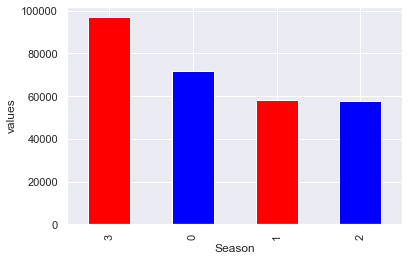

In [83]:
df_train['Season'].value_counts().plot.bar(color=[ 'red','blue']) #most passengers wanted to visit TRAPIST-1e
plt.xlabel('Season')
plt.ylabel('values')

In [84]:
## SPLIT TRAINING_DF to train-valid

In [85]:
X = df_train.drop('Season',axis =1)
y = df_train['Season']
X.head()

,Quantity Ordered,Price Each,Month,Day,Year,Total_Price,Product_20in Monitor,Product_27in 4K Gaming Monitor,Product_27in FHD Monitor,Product_34in Ultrawide Monitor,...,Product_iPhone,City_ Atlanta,City_ Austin,City_ Boston,City_ Dallas,City_ Los Angeles,City_ New York City,City_ Portland,City_ San Francisco,City_ Seattle
2120,1,389.99,4,29,21,389.99,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9972,1,11.95,4,3,21,11.95,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,14.95,5,9,21,14.95,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3946,1,14.95,6,3,21,14.95,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14957,1,3.84,4,24,21,3.84,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_vaild, y_train, y_vaild = train_test_split(X,y, train_size=0.8)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model =LogisticRegression()

model.fit(X_train, y_train)
preds=model.predict(X_vaild)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14499
           1       0.57      0.79      0.66     11595
           2       0.00      0.00      0.00     11548
           3       0.69      1.00      0.82     19315

    accuracy                           0.50     56957
   macro avg       0.32      0.45      0.37     56957
weighted avg       0.35      0.50      0.41     56957



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


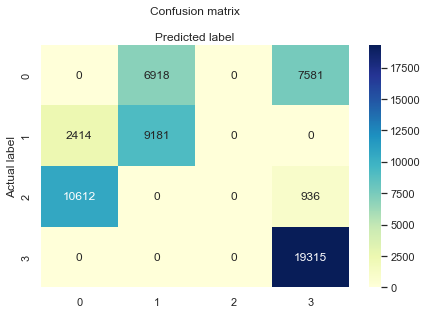

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_vaild, preds)
cnf_matrix

import matplotlib.pyplot as plt
import numpy as np
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


from sklearn.metrics import classification_report
print(classification_report(y_vaild, preds))

# Conclusion : 

With this kind of data ,classification did not give any good results.

Next I Will use Forcasting And Regression methods and see what the results.
